# Chapter 7 CNN 

CNN은 이미지 인식과 음성 인식 등에서 사용합니다. 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 합니다. 

CNN
- CNN도 지금까지 본 신경망과 같이 계층을 조합하여 만들 수 있습니다. 
- 합송곱 계층/풀링 계층과 기존에 있던 신경망의 층으로 구성되어 있습니다. 
- CNN은 완전연결 신경망입니다. 
- 대략적 구조 
    - ConV-ReLU- Pooling
    - 기존 구조 Affine-Relu
- 마지막 출력 계층에서는 Affine-Softmax 조합을 그대로 사용합니다

완전연결 계층은 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있습니다. 그렇지만 데이터의 형상이 무시됩니다. 이미지를 예를 들면 완전연결 계층에 이미지 데이터를 입력할 때는 3차워 데이터를 평평한 1차원 데이터로 평탄해줘야 합니다. 

하지만 합성곱 계층은 형상을 유지합니다. 이미지도 3차워 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달합니다. 그래서 이미지처럼 형상을 가진 데이터를 제대로 이해하는 것입니다. 

CNN에서는 합송곱 계층의 입출력 데이터를 특징 맵이라고도 합니다. 합성곱 계층의 입력 데이터를 입력 특징 맵, 출력 데이터를 출력 특징 맵이라고 합니다. 

합성곱 연산 
- 합성곱 게층에서의 합송곱 연산을 처리합니다. 합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당합니다. 
- 합성곱은 element wise product으로 4x4 입력 데이터와 3x3 필터가 있을 시 2X2로 출력합니다. 
- 편향도 CNN에 존재합니다. 각 원소에 + bias를 합니다.

패딩
- 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0)으로 채우기도 합니다 
- 만약 폭 1짜리 패딩을 적용하면 입력 데이터 boundary에 0인 원소들이 새로 생깁니다. 

스트라이드 
- 스트라이드는 sliding 윈도우와 비슷합니다. 
- 필터를 적용하는 위치의 간격입니다. 
- 스트라이드가 2로 하면 하나의 합성곱 연산에 들어가는 입력 데이터를 2칸식 이동하여 계산합니다. 

입력 크기(H, W)/필터 크기(FH, FW)/출력 크기(OH, OW)/패딩(P)/스트라이드(S)의 관계 

$$ 
OH = \frac{H + 2P - FH}{S} + 1 
$$

$$
OW = \frac{W + 2P - FW}{S} + 1 
$$

출력 크기가 정수가 아니면 오류를 내는 등의 대응이 필요합니다. 또한 값이 딱 나눠떨어지지 않을 때는 가까운 정수로 반올림하는 등 특별히 에러는 내지 않고 진행하도록 구현한 경우도 있습니다. 

3차원 데이터의 합성곱 연산 
- 2차원 일때와 비교하면 길이 혹은 채널 방향으로 특징 맵이 늘어났습니다. 채널쪽으로 특징 맵이 여러 개 있으면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고 그 결과를 더해서 하나의 출력을 얻습니다. 
- 3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필너의 채널 수가 같아야 합니다. 

배치 처리 
- 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장합니다. 구체적으로는 데이터 수, 채널 수, 높이, 너비 
- 배치 처리 시 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐릅니다. 
- 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다는 것입니다. 

풀링 계층 
- 풀링은 세로/가로 방향의 공간을 줄이는 연산입니다. 
- 풀링의 종류 
    - 최대 풀링
        - 스트라이드를 n으로 처리하여 nxn중 가장 큰 값을 가져와 nxn 출력층을 만듭니다
    - 평균 풀링 
        - 최대 풀링과 다르게 평균값을 가지고 옵니다 
- 풀링은 일반적으로 윈도우 크기와 스트라이드를 동일 하개 합니다. 
- 특징 
    - 학습해야 할 매개변수가 없다 
    - 채널 수가 변하지 않는다 
    - 입력의 변화에 영향을 적게 받는다 

In [1]:
##합성곱 풀링 계층 구현하기 
## 4차원 데이터 배열 
import numpy as np 
x = np.random.rand(10, 1, 28, 28)
print(x.shape)
print(x[0].shape)
print(x[1].shape)
# 첫 채널 공간 데이터 
print(x[0,0])

(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)
[[0.14757551 0.72285559 0.91968674 0.84133326 0.61783009 0.16256359
  0.43606095 0.1312974  0.91275817 0.02714945 0.45486756 0.32580759
  0.11908366 0.6224879  0.85888689 0.11567667 0.26242878 0.20650811
  0.06887444 0.77252336 0.69972839 0.21961892 0.41686175 0.33786246
  0.2736403  0.88637276 0.9305572  0.8627709 ]
 [0.86733769 0.53135643 0.14252406 0.56338745 0.22084884 0.37044643
  0.01303456 0.69097641 0.43126456 0.29740436 0.86196955 0.95476431
  0.86780301 0.51456233 0.67540142 0.2123251  0.21909841 0.79802107
  0.05454144 0.98678971 0.19905217 0.40455133 0.01430747 0.16509131
  0.45292082 0.28487699 0.03523476 0.7184923 ]
 [0.70859481 0.12918629 0.49905056 0.0924552  0.73924721 0.29057954
  0.59425281 0.26788643 0.35132501 0.47356686 0.82109923 0.873001
  0.6390603  0.58839852 0.60406699 0.01165664 0.7217198  0.54829709
  0.81161805 0.07836216 0.66843341 0.77866737 0.87457341 0.67764054
  0.93132953 0.52193793 0.22701787 0.82149681]
 [0.8

im2col로 데이터 전개하기 
- 합성곱 연산을 FOR 문으로 구연시 성능이 떨어집니다. 
- 그러므로 3/4 차원데이터를 2차원으로 표현합니다. 
- IMAGE TO COLUMN
- im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터를 1열로 전개하고 두 행렬의 곱을 계산하면 됩니다. 

In [2]:
## 합성곱 계층 구현하기 

import sys, os 
sys.path.append(os.pardir)
from common.util import im2col 

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x1 = np.random.rand(10,3,7,7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)


(9, 75)
(90, 75)


In [3]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [5]:
import numpy as np


network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

W1 1.1384462146795284e-05
b1 4.311173326981536e-05
W2 6.134188714137366e-11
b2 6.0310795696114085e-09
W3 1.4802555928476334e-10
b3 1.7989118968469996e-07


train loss:2.3002611438427842
=== epoch:1, train acc:0.251, test acc:0.289 ===
train loss:2.298037887194883
train loss:2.2943628265203286
train loss:2.2914230984562045
train loss:2.2853682414587815
train loss:2.276819710128319
train loss:2.264220493704185
train loss:2.248528674565092
train loss:2.2392465602416425
train loss:2.2124984189577233
train loss:2.1861350970537416
train loss:2.154821923772509
train loss:2.1427054789505053
train loss:2.070504646054822
train loss:2.042814037444307
train loss:2.029210364979061
train loss:1.9259827538793362
train loss:1.897181947984329
train loss:1.7701572344859167
train loss:1.7593862075140434
train loss:1.6508260752832158
train loss:1.5546891445201134
train loss:1.4998116079172374
train loss:1.3646102486990304
train loss:1.3025424345129661
train loss:1.2360402515919244
train loss:1.2060971343755316
train loss:1.1492776219919536
train loss:0.9589537266404667
train loss:1.0183751518861914
train loss:1.045462908792719
train loss:0.9473189079122486
t

train loss:0.13577178952755098
train loss:0.10069112024693697
train loss:0.22864086594382907
train loss:0.15261827693395721
train loss:0.22652830250614497
train loss:0.15957363203247357
train loss:0.09142661922852616
train loss:0.14674901455984768
train loss:0.11854628942144217
train loss:0.24869775384945744
train loss:0.1038459105274113
train loss:0.17100856866931644
train loss:0.15514755743171066
train loss:0.22422247343872617
train loss:0.18151828824927993
train loss:0.14238874209433783
train loss:0.11848602447958186
train loss:0.17008693677187417
train loss:0.18062711046655663
train loss:0.2352042339315114
train loss:0.10110259700247326
train loss:0.12992135697952148
train loss:0.2305715325787672
train loss:0.0930755179808311
train loss:0.23948075157490523
train loss:0.1361133863003254
train loss:0.1671418915562725
train loss:0.11287627417886309
train loss:0.10174497001634071
train loss:0.20199909763075147
train loss:0.08778525601486599
train loss:0.1550893189495027
train loss:0.11

train loss:0.08290194681668187
train loss:0.05009882310391036
train loss:0.09806288488268831
train loss:0.11440998606940898
train loss:0.11330774543707403
train loss:0.04677255708973115
train loss:0.08225155922326462
train loss:0.05622654907199938
train loss:0.037632446152879744
train loss:0.08952561975865851
train loss:0.13757575216809778
train loss:0.048668054050983664
train loss:0.037338781658087516
train loss:0.045848262915719314
train loss:0.03332823704119416
train loss:0.04170026158932412
train loss:0.03925176505729815
train loss:0.03338189363098964
train loss:0.05264515475309601
train loss:0.04866259588286197
train loss:0.07998663279646236
train loss:0.05862103173486598
train loss:0.11963537373069771
train loss:0.05761316926448947
train loss:0.04938575951096687
train loss:0.045645488756810494
train loss:0.066576225043297
train loss:0.04702286126647581
train loss:0.05878557153468842
train loss:0.05600868678156066
train loss:0.026120821125029812
train loss:0.027676671316663327
===

train loss:0.014802586008718411
train loss:0.024858588144863875
train loss:0.01599301596998147
train loss:0.01953746882414147
train loss:0.024299984117041346
train loss:0.016082162015016242
train loss:0.016804603926348444
train loss:0.0377649834585229
train loss:0.05224473401717547
train loss:0.045207925811232744
train loss:0.01162217915529538
train loss:0.027628866251470832
train loss:0.025817927404494193
train loss:0.01339191051954331
train loss:0.01598788160868174
train loss:0.044828569559539996
train loss:0.03565258837462147
train loss:0.010663736687191519
train loss:0.012376817997982362
train loss:0.01221851196469121
train loss:0.014763291143556482
train loss:0.0633099344795378
train loss:0.03960672286782302
train loss:0.035015999286535
train loss:0.024057766478847324
train loss:0.06858436520187873
train loss:0.022846595943334814
=== epoch:17, train acc:0.987, test acc:0.955 ===
train loss:0.027327651008266778
train loss:0.029167213757280378
train loss:0.02712158207372076
train lo

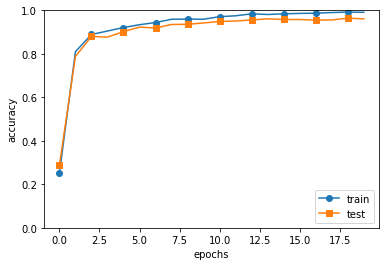

In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


대표적인 CNN으로는 LeNET와 AlexNet이 있습니다. 

Summary 
- CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col (이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝의 발전에는 빅 데이터와 GPU가 크게 기여했다.